In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [3]:
particlesDict = {}

In [4]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [5]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [6]:
def cos_theta_distribuition(file_name):
    cos_thetap = []
    cos_thetam = []
    for e in pylheV.readLHE(file_name):
        for ptc in e.particles:
            if ptc.status > 0:
                p_square = ptc.px**2 + ptc.py**2 + ptc.pz**2
                p = np.sqrt(p_square)
                if ptc.id == -11:
                    cos_thetap.append(ptc.pz/p)
                else:
                    cos_thetam.append(ptc.pz/p)
            
    
    return cos_thetap, cos_thetam
    
    
    

In [7]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass(file_name):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        energy = 0
        px = 0
        py = 0
        pz = 0
        for ptc in e.particles:
            if ptc.status > 0:
                #Summing all components of final e+ and e-
                energy = energy + ptc.e
                px = px + ptc.px
                py = py + ptc.py
                pz = pz + ptc.pz
        
        #Calculating the invariant mass
        inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
                
                    

        invariant_mass.append(inv_mass)

                
    return invariant_mass
   

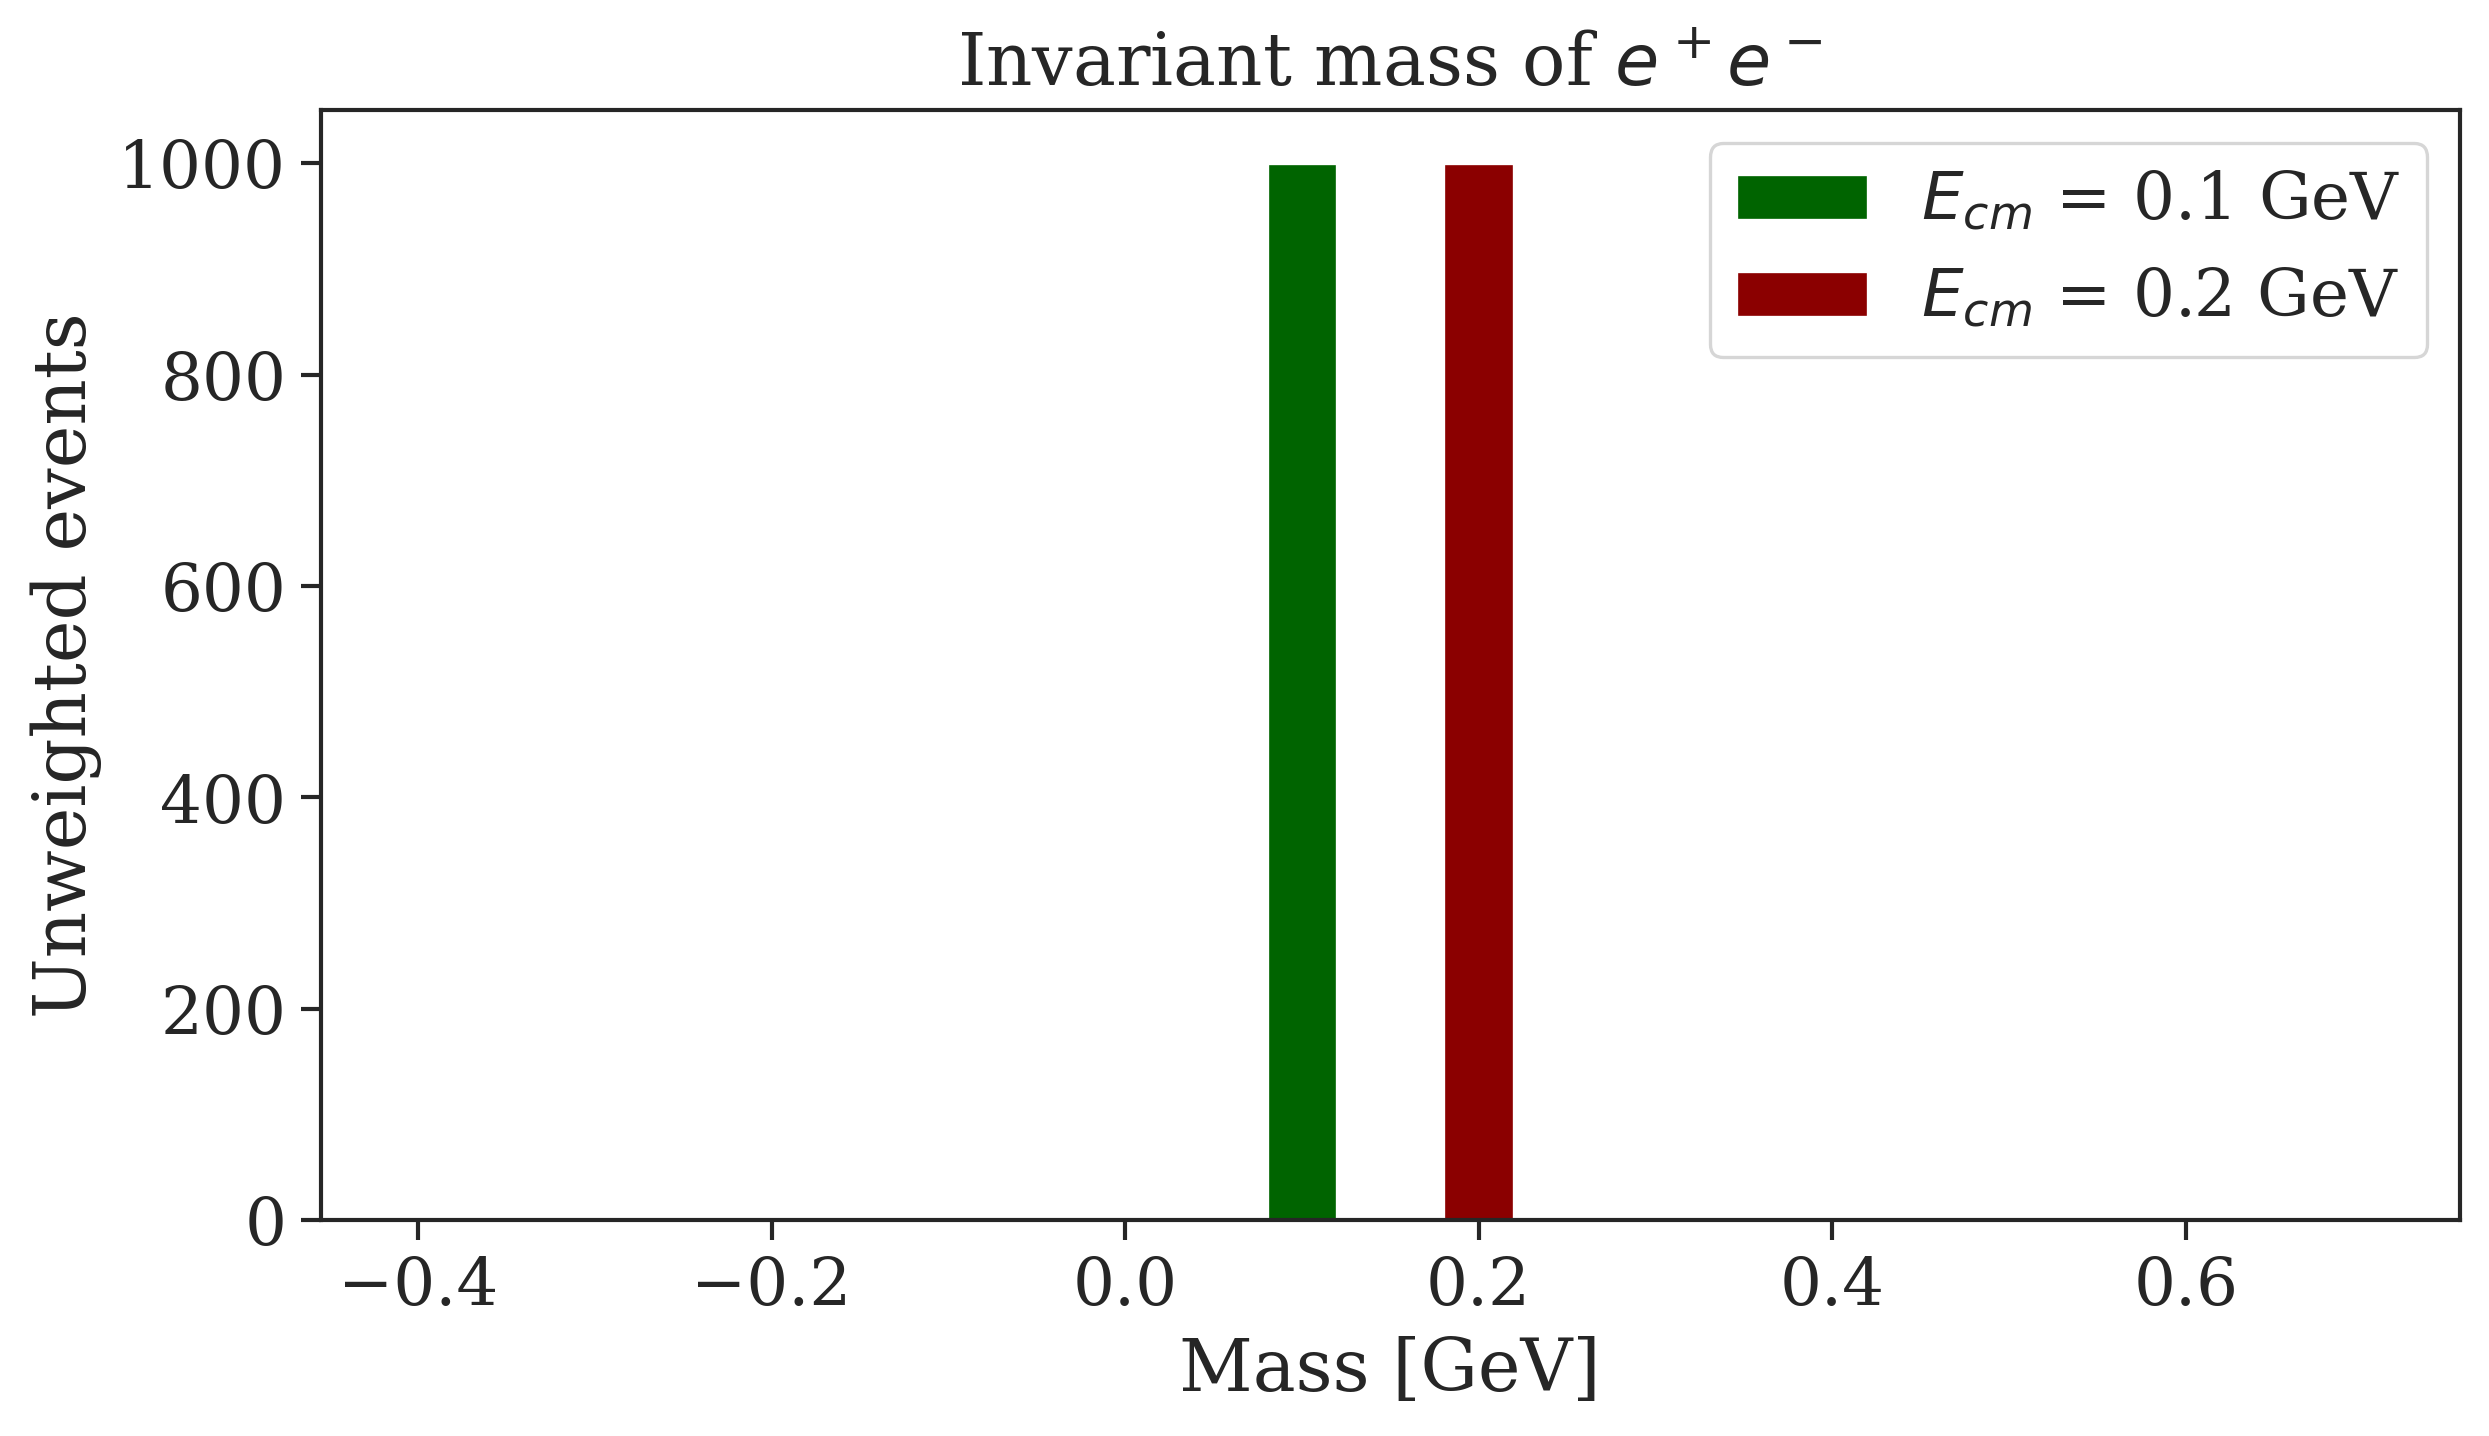

In [8]:
#Invariant mass plot
inv_mass_dot1GeV = invariant_mass('e+e-_dot1GeV_out.lhe')
inv_mass_dot2GeV = invariant_mass('e+e-_dot2GeV_out.lhe')
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(inv_mass_dot1GeV, bins = 25,  color = 'darkgreen',label =r'$E_{cm}$ = 0.1 GeV ')
histogram1 = plt.hist(inv_mass_dot2GeV, bins = 25, color = 'darkred',label =r'$E_{cm}$ = 0.2 GeV')


plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass of $e^+e^-$')
plt.ylabel(r'Unweighted events')
plt.legend()
plt.savefig('Invariant_mass_epem.pdf')
plt.show()

In [9]:
#Cross section and E_cm values

cross_section = [3.922e+09,3.558e+09,
3.242e+09, 2.966e+09,
2.724e+09, 2.51e+09 ,2.321e+09, 2.152e+09,2.001e+09,
1.865e+09,1.743e+09,  1.633e+09,
1.532e+09, 
1.441e+09,
1.357e+09,  
1.281e+09,1.211e+09,  1.146e+09,
1.086e+09, 1.031e+09,
9.806e+08]
e_cm = []
for i in range(21):
    e_cm.append(0.1+i*0.005)

alpha_square = 1/(137**2)

In [10]:
coeff = np.polyfit(e_cm,cross_section,2)
p = np.poly1d(coeff)

x = np.linspace(0.1, 0.2, 100)
print(coeff)

[ 2.79242177e+11 -1.10922523e+11  1.20852956e+10]


In [11]:
def func(x, a):
    return (a/(x**2))

In [12]:
popt, pcov = sc.optimize.curve_fit(func, e_cm, cross_section)
popt = popt/alpha_square
print(popt)

[7.36178833e+11]


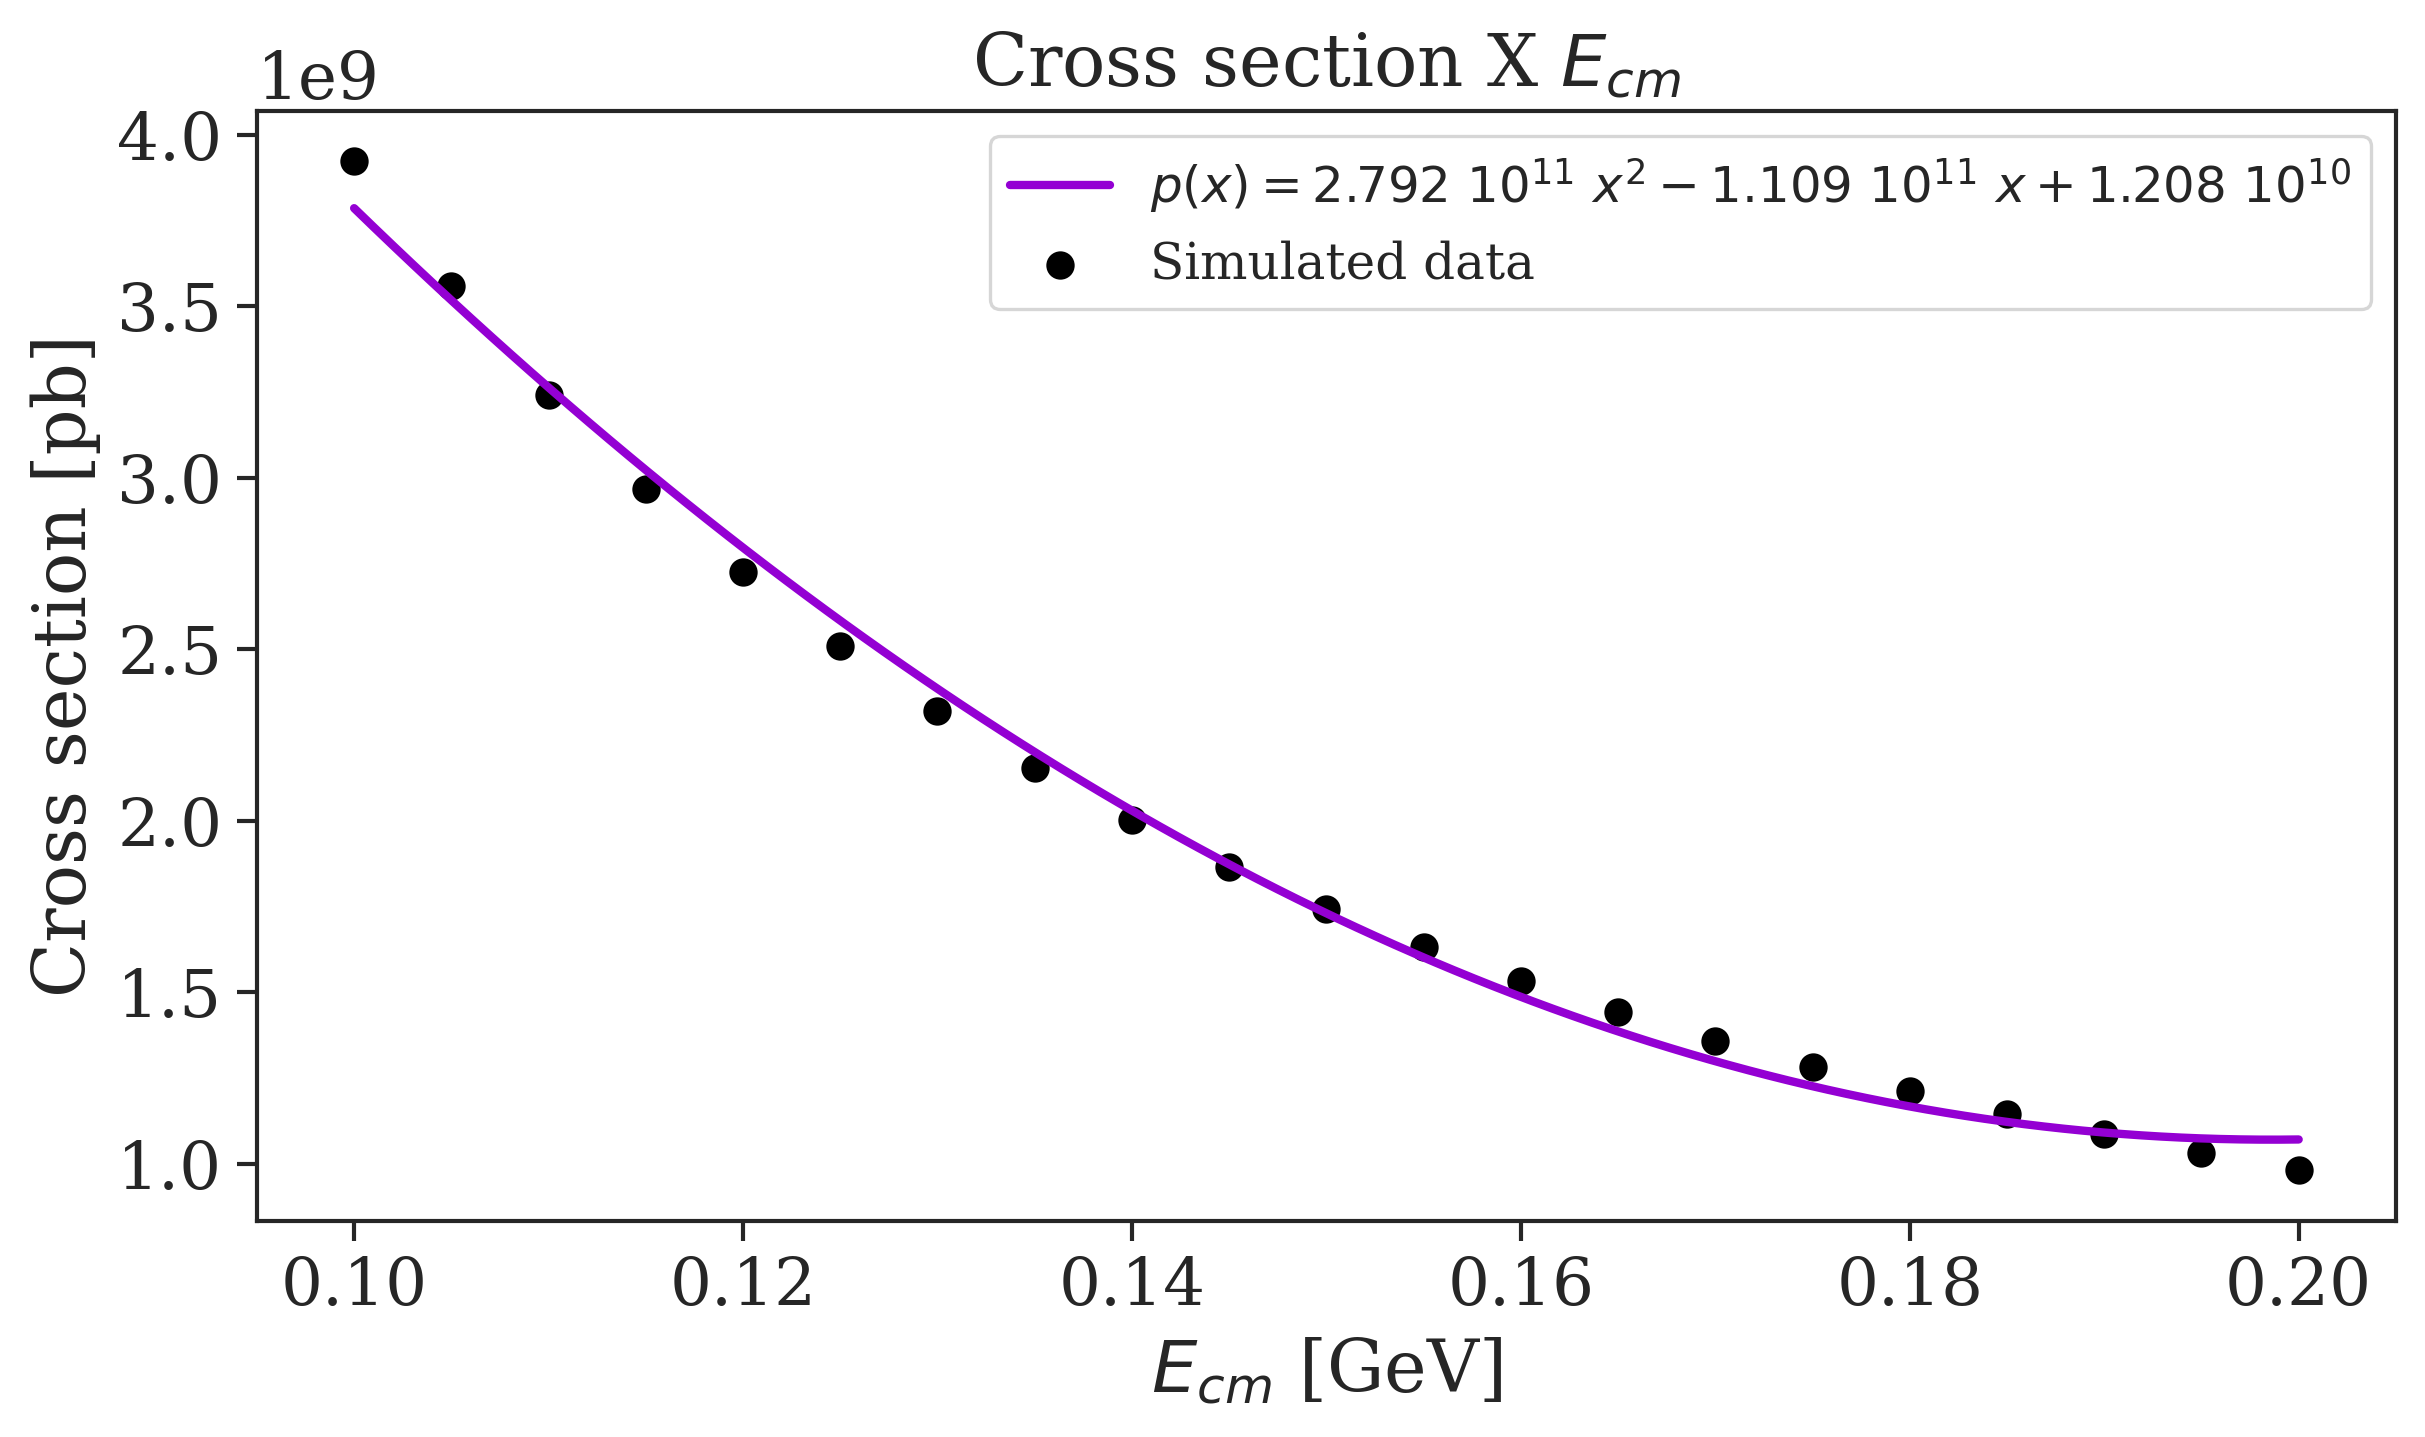

In [12]:
#Cross section X E_cm plot (polynomial fit)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.scatter(e_cm,cross_section, linewidth = 2, color = 'black',label = r'Simulated data')
plt.plot(x,p(x),linewidth = 2, color = 'darkviolet', label = r'$p(x) = 2.792 \ 10^{11} \ x^2 - 1.109 \ 10^{11} \ x + 1.208 \ 10^{10}  $')



plt.ylabel(r'Cross section [pb]')
plt.xlabel(r'$E_{cm}$ [GeV]')
plt.title(r'Cross section X $E_{cm}$')
plt.legend(fontsize = 12)
plt.savefig('CsXEcmq_epem.pdf')
plt.show()

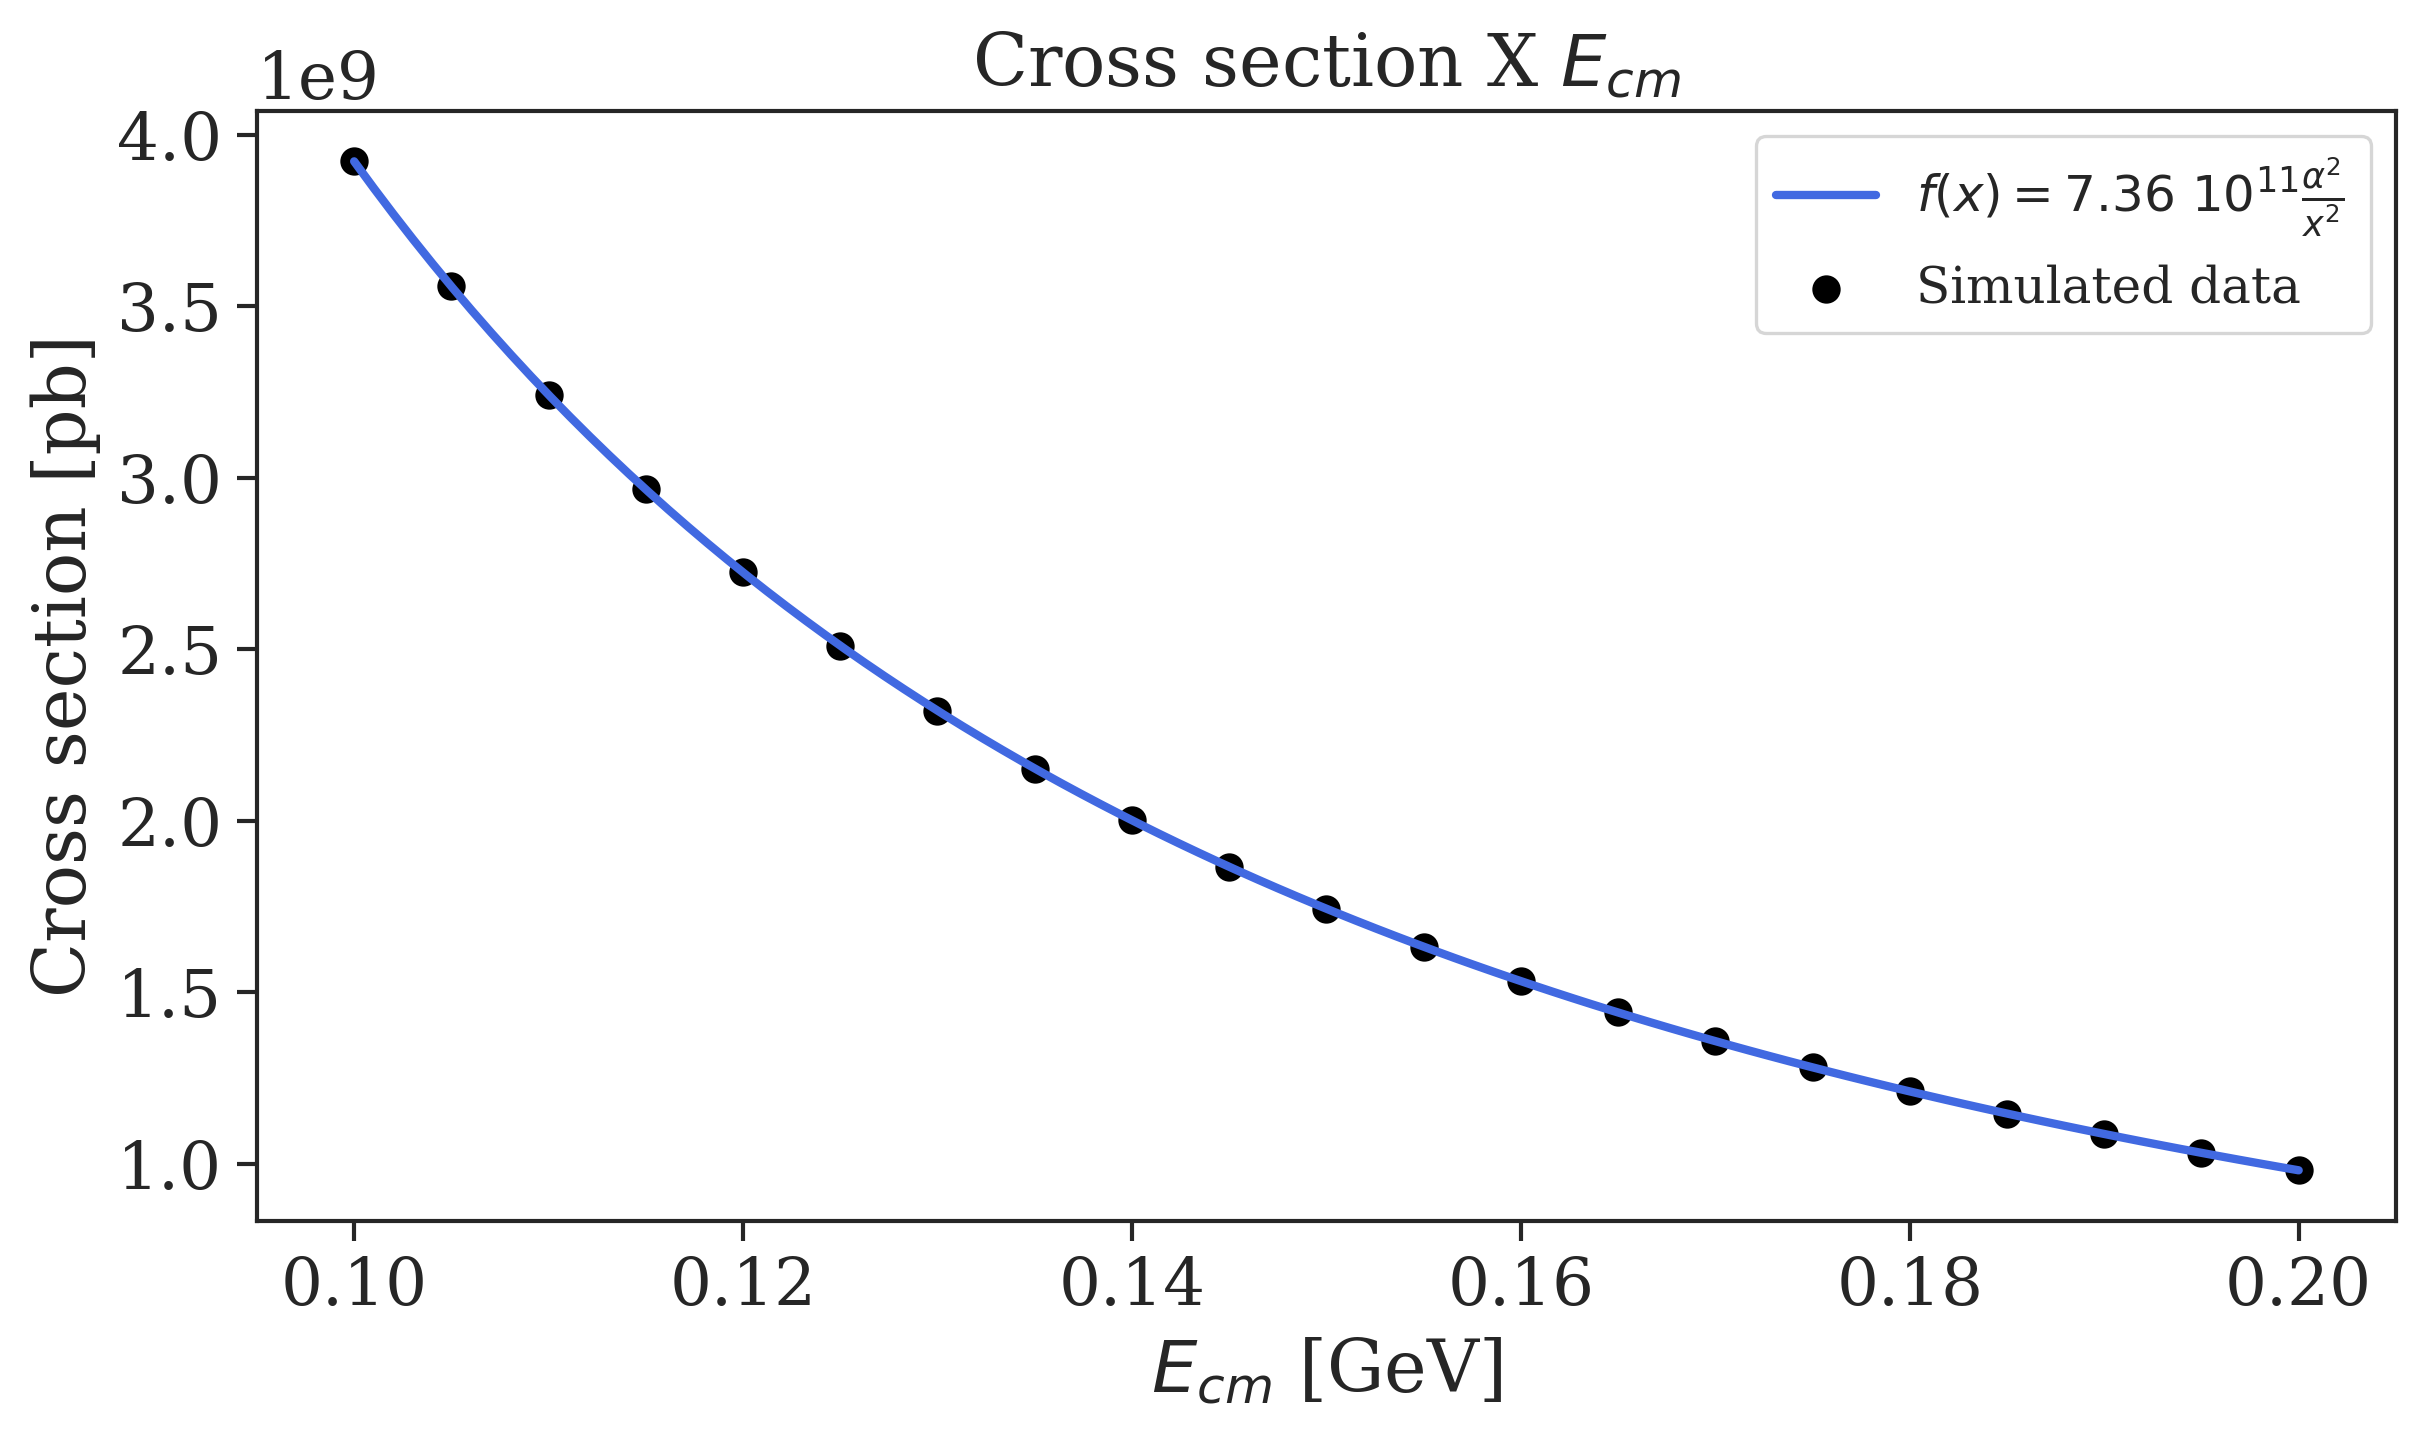

In [13]:
#Cross section X E_cm plot (1/x^2 fit)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.scatter(e_cm,cross_section, linewidth = 2, color = 'black',label = r'Simulated data')
plt.plot(x, func(x,*popt*alpha_square), linewidth = 2, color = 'royalblue', label = r'$f(x) = 7.36 \ 10^{11}\frac{\alpha^2}{x^2} $ ')


plt.ylabel(r'Cross section [pb]')
plt.xlabel(r'$E_{cm}$ [GeV]')
plt.title(r'Cross section X $E_{cm}$')
plt.legend(fontsize = 12)
plt.savefig('CsXEcm_epem.pdf')
plt.show()

In [13]:
#Rutherford scattering diferential cross section
e = 1.602 * (10**(-19))
k = 8.9876 * 2 * 79 * (e**2) * (10**9) #Coulomb constant
m = 6.6447 * (10**(-27))#kg or 3.7274 GeV



#v = 0.479e8 #15000000 m/s
v = 15000000

kinetic = 0.5*m*(v**2)
print('T = ',kinetic)
alfa = (k/(4*kinetic))**2
print(alfa)
alfa = alfa*(10**28)

cos_theta = np.arange(-1,0.9,0.00001)
y = alfa/(((1-cos_theta)/2)**2)


T =  7.475287500000001e-13
1.4855111256208546e-28


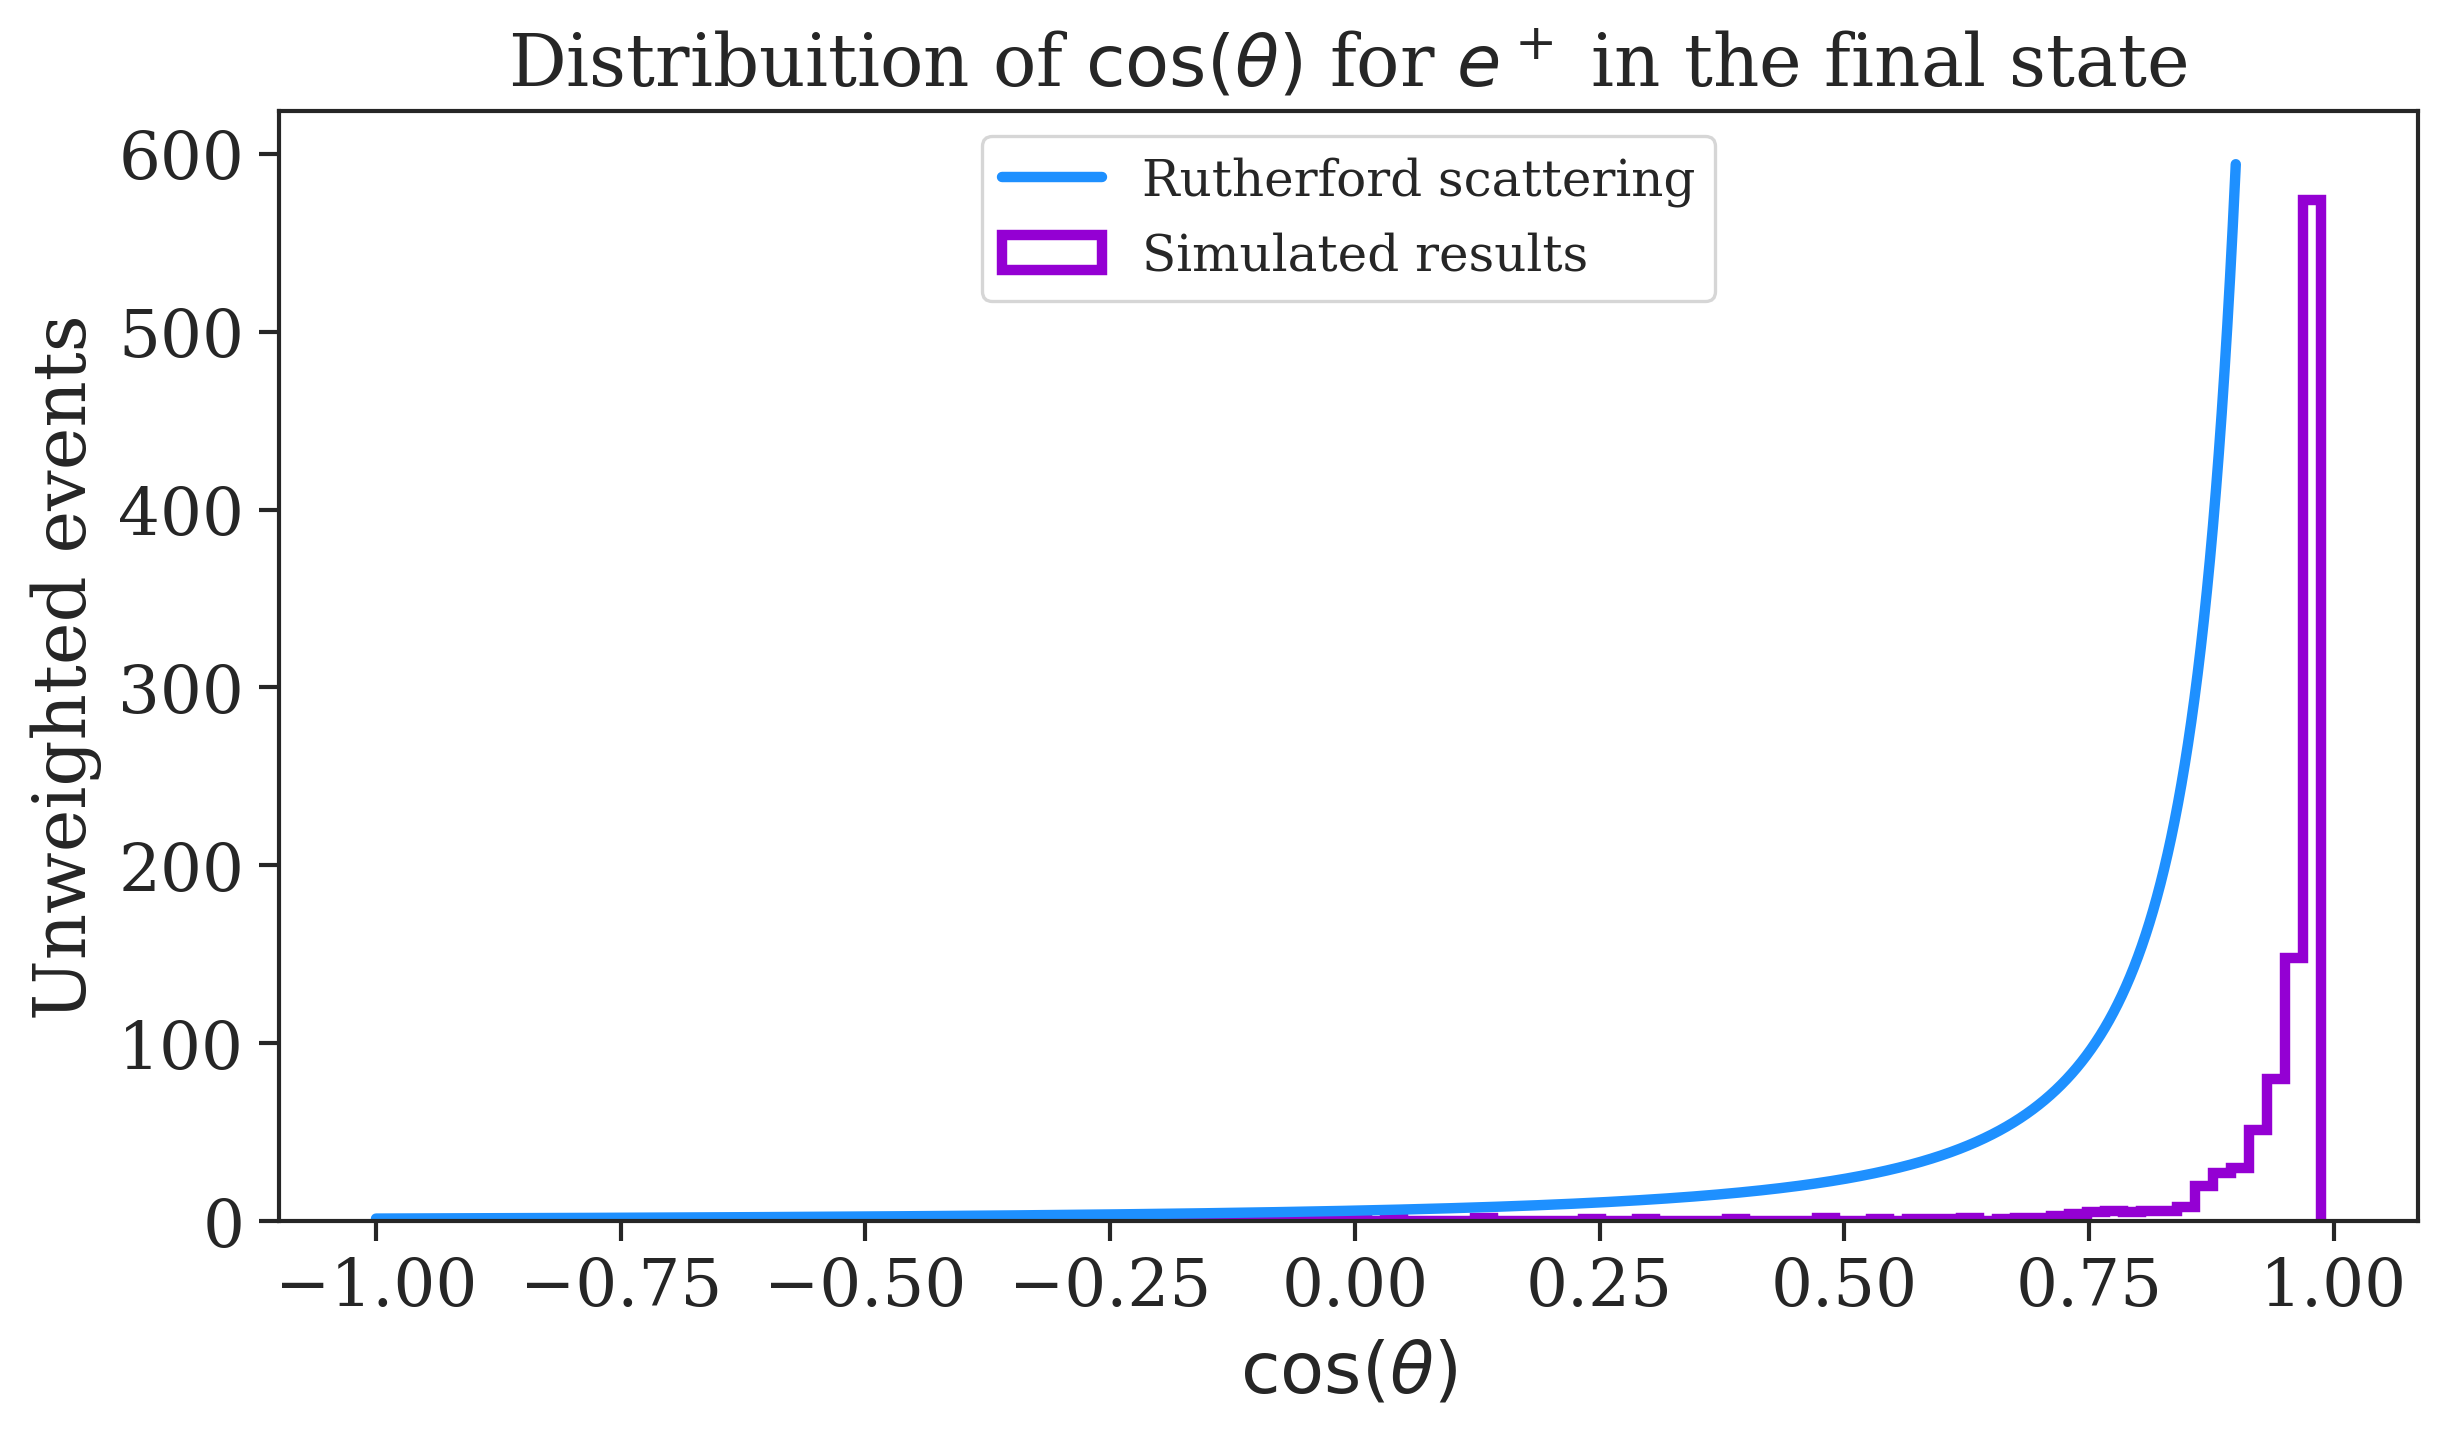

In [35]:

fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

#Rutherford diferential cross section
plot = plt.plot(cos_theta,y,  color = 'dodgerblue', label = r'Rutherford scattering', linewidth = 2.5)

#Simulated distribuition
cos_thetap1, cos_thetam1 = cos_theta_distribuition('e+e-_dot1GeV_out.lhe')
plt.hist(cos_thetap1, bins=100, histtype = 'step', linewidth =2.5, color = 'darkviolet', label = r'Simulated results')

plt.ylabel(r'Unweighted events')
plt.xlabel(r'$\cos{(\theta)}$')
plt.title(r'Distribuition of $\cos{(\theta)}$ for $e^+$ in the final state')
plt.legend(loc ='upper center', fontsize = 12)
plt.savefig('cosT_distribution.pdf')


plt.show()

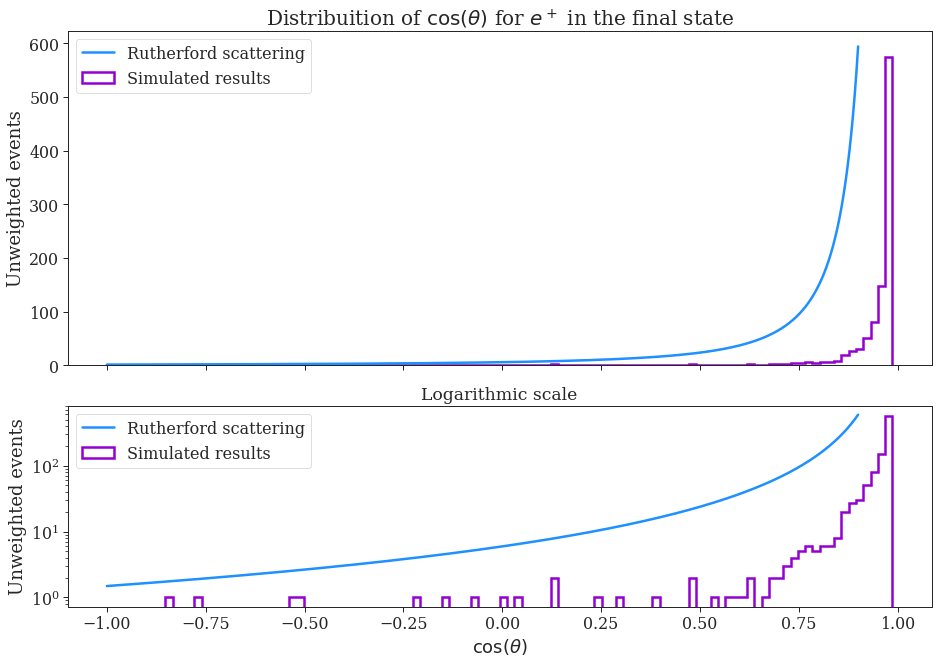

In [37]:
#Graph with the log scale

f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [15,10])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.15)


#Fig 1
cos_thetap1, cos_thetam1 = cos_theta_distribuition('e+e-_dot1GeV_out.lhe')
axarr[0].plot(cos_theta,y,  color = 'dodgerblue', label = r'Rutherford scattering', linewidth = 2.5)
axarr[0].hist(cos_thetap1, bins=100, histtype = 'step', linewidth =2.5, color = 'darkviolet', label = r'Simulated results')
axarr[0].set_ylabel('Unweighted events',fontsize = 18)
axarr[0].set_title(r'Distribuition of $\cos{(\theta)}$ for $e^+$ in the final state', fontsize = 20)



#Fig 2

axarr[1].plot(cos_theta,y,  color = 'dodgerblue', label = r'Rutherford scattering', linewidth = 2.5)
axarr[1].hist(cos_thetap1, bins=100, histtype = 'step', linewidth =2.5, color = 'darkviolet', label = r'Simulated results')
axarr[1].set_ylabel('Unweighted events', fontsize = 18)
axarr[1].set_xlabel(r'$\cos{(\theta)}$', fontsize = 18)
axarr[1].set_title(r'Logarithmic scale')
axarr[1].set_yscale('log')
axarr[0].legend(fontsize=16)
axarr[1].legend(fontsize=16)

plt.savefig('cosT_distribution1.pdf', dpi = 300)
plt.show()